# Function Approximation With Neural Networks

In [6]:
# NumPy imports
import numpy as np

# Torch imports                                    
import torch
import torch.nn as nn
import torch.optim as optim

# Matplotlib imports
import matplotlib.pyplot as plt
import utils_plots

In [7]:
# Generation of training data in NumPy
x_np = np.linspace(-1, 1, 500)  # x data (numpy array), shape=(500,)
y_np = np.linspace(-1, 1, 500)  # y data (numpy array), shape=(500,)
z_np = np.sin(np.sqrt(x_np**2 + y_np**2)).reshape(-1, 1)  # z data (numpy array), shape=(500, 1)

# Create a grid of x and y values
x_grid, y_grid = np.meshgrid(x_np, y_np)

# Calculate z values for the grid
z_grid = np.sin(np.sqrt(x_grid**2 + y_grid**2))

# Conversion of the grid data to PyTorch tensors
x = torch.from_numpy(x_grid).float().unsqueeze(-1)
y = torch.from_numpy(y_grid).float().unsqueeze(-1)
z = torch.from_numpy(z_grid).float().unsqueeze(-1)

# Concatenation of x and y to form the input data
input_data = torch.cat((x, y), dim=-1)

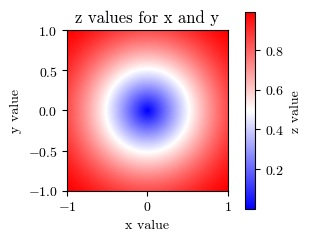

In [8]:
# Plot the z values
plt.figure(figsize=(3, 2.5))
plt.imshow(z_grid, origin='lower', extent=(-1, 1, -1, 1),cmap=utils_plots.cmap_)
plt.colorbar(label='z value')
plt.xlabel('x value')
plt.ylabel('y value')
plt.title('z values for x and y')
plt.show()

In [9]:
# Definition of the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Creation of the neural network
net = Net()

# Definition of the optimizer and the loss function
optimizer = optim.Adam(net.parameters(), lr=0.01)
loss_func = nn.MSELoss()

In [10]:
# Initialize a list to store the loss values
loss_values = []

# Training the neural network
for i in range(500):
    prediction = net(input_data)     # input x and predict based on x
    loss = loss_func(prediction, z)     # must be (1. nn output, 2. target)
    
    # Append the current loss value to the list
    loss_values.append(loss.item())
    
    if i % 100 == 0:  # print every 100 iterations
        print(f"Iteration {i}: Loss {loss.item()}")
    
    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()

Iteration 0: Loss 0.6412454843521118


Iteration 100: Loss 0.007445582188665867
Iteration 200: Loss 0.00030731927836313844
Iteration 300: Loss 0.00018784042913466692
Iteration 400: Loss 0.00015143438940867782


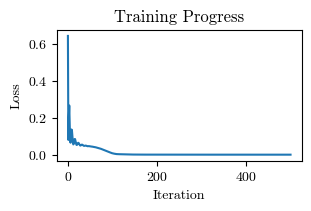

In [11]:
# Plot the loss values
plt.figure(figsize=(3, 2))
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.show()

In [12]:
# Save the model
torch.save(net.state_dict(), 'model.pth')

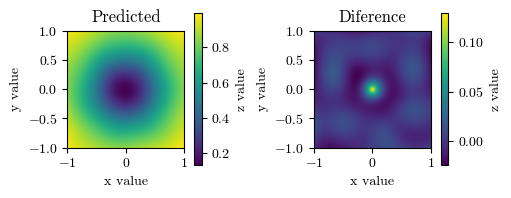

In [14]:
# Generate predictions using the neural network
z_pred = net(input_data).detach().numpy().reshape(x_grid.shape)

fig, axs = plt.subplots(1, 2, figsize=(5, 2))

# Plot the predicted z values
im1 = axs[0].imshow(z_pred, origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
axs[0].set_title('Predicted')
axs[0].set_xlabel('x value')
axs[0].set_ylabel('y value')
fig.colorbar(im1, ax=axs[0], label='z value')

# Plot the analytical z values
im2 = axs[1].imshow(z_pred-z_grid, origin='lower', extent=(-1, 1, -1, 1), cmap='viridis')
axs[1].set_title('Diference')
axs[1].set_xlabel('x value')
axs[1].set_ylabel('y value')
fig.colorbar(im2, ax=axs[1], label='z value')

plt.show()